# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

lat = []
lng = []
city_id = []
wind = []
hum = []
max_tmp = []
country = []
cloudiness = []
city_name = []
date = []

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        hum.append(response['main']['humidity'])
        max_tmp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        date.append(response['dt'])
        #print(f"Processing {cities[city]} | {city}")
    except: KeyError 
        
       #print(f"No data returnd for " {city}: "skipping.")
        
        
    
    print(city)


ribeira grande
sao joao da barra
jamestown
port-gentil
mar del plata
rikitea
kodiak
saleaula
kota bahru
alekseyevsk
punta arenas
yellowknife
puerto ayora
qaanaaq
aswan
kapaa
cabo san lucas
esperance
hobart
esso
pochutla
bage
neuquen
tiksi
feijo
cape town
kaitangata
belushya guba
doctor pedro p. pena
marcona
kahului
hithadhoo
albany
cidreira
barrow
yelbarga
monte patria
yelnya
hami
harper
saint-philippe
pevek
nikolskoye
pacific grove
huarmey
chokurdakh
hermanus
dikson
banfora
victoria
provideniya
tura
east london
demidov
salalah
nizhneyansk
busselton
ulladulla
new norfolk
nanortalik
vaini
thompson
bredasdorp
owensboro
alofi
alyangula
hilo
san patricio
katsuura
geraldton
ushuaia
souillac
upernavik
kununurra
arraial do cabo
ponta delgada
mataura
gunjur
gambela
vila franca do campo
taolanaro
ihosy
sarkand
iqaluit
port alfred
vestmanna
inirida
necochea
catamarca
tasiilaq
carnarvon
nijar
merauke
san cristobal
atuona
tsihombe
kigorobya
port elizabeth
hasaki
khatanga
yenagoa
kenai
butaritari
v

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City Name": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_tmp,
    "Wind Speed": wind
    
}

weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Ribeira Grande,4,PT,1579753946,80,38.52,-28.70,52.77,9.80
1,Sao Joao da Barra,100,BR,1579754334,90,-21.64,-41.05,72.55,4.90
2,Jamestown,1,US,1579753705,62,42.10,-79.24,32.00,6.93
3,Port-Gentil,33,GA,1579754334,75,-0.72,8.78,83.23,4.09
4,Mar del Plata,0,AR,1579753762,94,-38.00,-57.56,69.01,3.36


In [5]:
south_forgets = weather_df.loc[weather_df["Latitude"]<= 0, :]

south_forgets.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
1,Sao Joao da Barra,100,BR,1579754334,90,-21.64,-41.05,72.55,4.90
3,Port-Gentil,33,GA,1579754334,75,-0.72,8.78,83.23,4.09
4,Mar del Plata,0,AR,1579753762,94,-38.00,-57.56,69.01,3.36
5,Rikitea,12,PF,1579753759,75,-23.12,-134.97,79.61,12.46
9,Punta Arenas,75,CL,1579753940,81,-53.15,-70.92,48.20,9.17


In [6]:
north_remembers = weather_df.loc[weather_df["Latitude"] >= 0, :]


north_remembers.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Ribeira Grande,4,PT,1579753946,80,38.52,-28.70,52.77,9.80
2,Jamestown,1,US,1579753705,62,42.10,-79.24,32.00,6.93
6,Kodiak,1,US,1579753965,53,57.79,-152.41,23.00,12.75
7,Kota Bharu,40,MY,1579754335,74,6.13,102.24,86.00,11.41
8,Alekseyevsk,100,RU,1579754335,94,57.84,108.35,-7.10,14.67


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

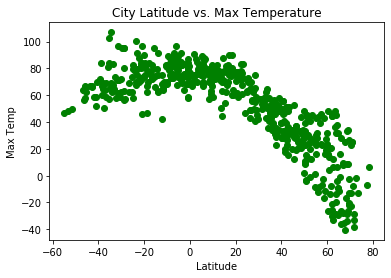

In [7]:
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(weather_df[["Latitude"]], weather_df[["Max Temperature"]], marker="o", color="green")
plt.show()

#### Latitude vs. Humidity Plot

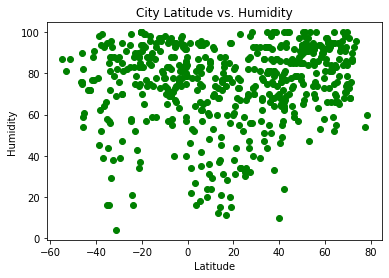

In [8]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(weather_df[["Latitude"]], weather_df[["Humidity"]], marker="o", color="green")
plt.show()

#### Latitude vs. Cloudiness Plot

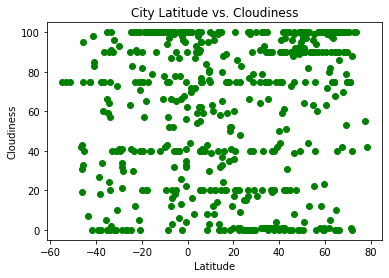

In [9]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(weather_df[["Latitude"]], weather_df[["Cloudiness"]], marker="o", color="green")
plt.show()

#### Latitude vs. Wind Speed Plot

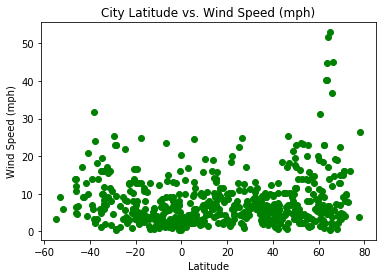

In [10]:
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(weather_df[["Latitude"]], weather_df[["Wind Speed"]], marker="o", color="green")
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

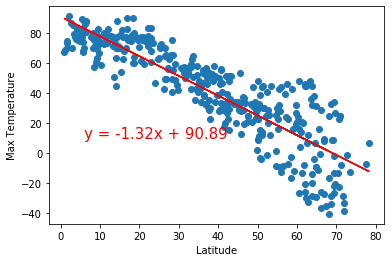

In [13]:
x_values = north_remembers['Latitude']
y_values = north_remembers['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

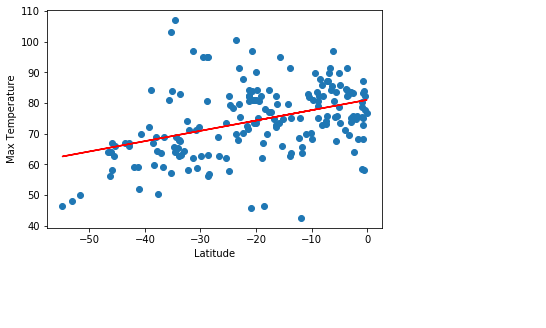

In [14]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

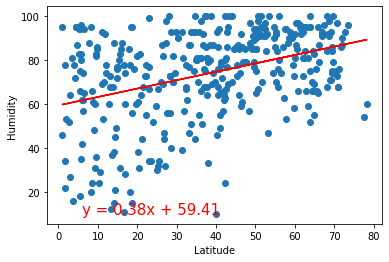

In [15]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

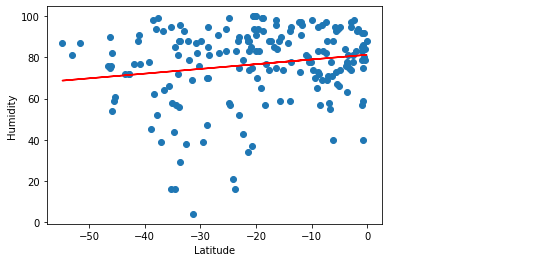

In [16]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

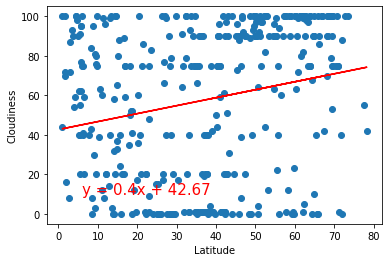

In [17]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

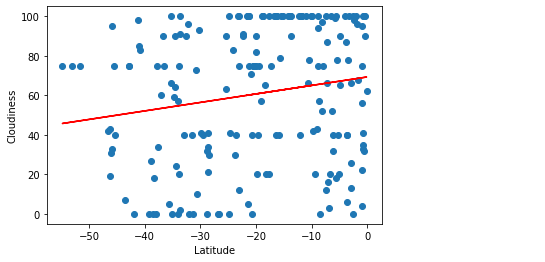

In [18]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

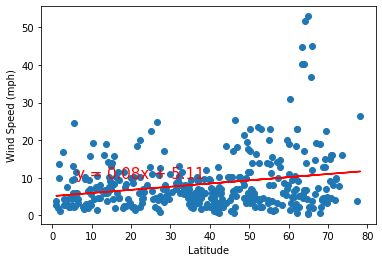

In [19]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

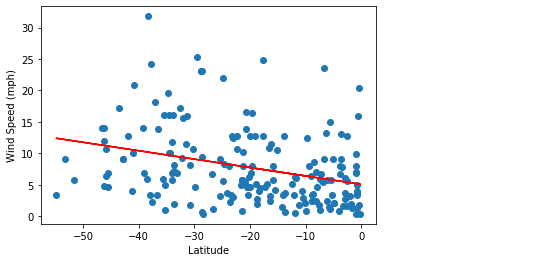

In [20]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()